In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [322]:
# Importing dataset
data = pd.read_csv("AB_NYC_2019.csv")

# DATA PREPROCESSING

In [323]:
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [324]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [326]:
data.isna().sum().to_frame().reset_index()

,index,0
0,id,0
1,name,16
2,host_id,0
3,host_name,21
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [327]:
data["last_review"].fillna("Unknown", inplace=True)
data["name"].fillna("None", inplace=True)
data["host_name"].fillna("Unknown", inplace=True)
data["reviews_per_month"].fillna(data["reviews_per_month"].mode()[0], inplace=True)

In [328]:
data.isna().sum().to_frame().reset_index()

,index,0
0,id,0
1,name,0
2,host_id,0
3,host_name,0
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [329]:
print("Rows with 0 in price column: {}".format(len(data[data["price"] == 0])))
data = data.loc[~(data["price"] == 0)] # Dropping them
data.head()

Rows with 0 in price column: 11


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.02,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [330]:
print("The number of duplicated rows: ",data.duplicated().sum(),"\n")
for i in data.columns:
    if len(data[i].unique()) > 15 :
        print("{} no. of unique: {}".format(i,len(data[i].unique())))
    else:
        print("{} no. of unique {} + unique values: {}".format(i,len(data[i].unique()), data[i].unique()))

The number of duplicated rows:  0 

id no. of unique: 48884
name no. of unique: 47895
host_id no. of unique: 37455
host_name no. of unique: 11451
neighbourhood_group no. of unique 5 + unique values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
neighbourhood no. of unique: 221
latitude no. of unique: 19046
longitude no. of unique: 14715
room_type no. of unique 3 + unique values: ['Private room' 'Entire home/apt' 'Shared room']
price no. of unique: 673
minimum_nights no. of unique: 109
number_of_reviews no. of unique: 394
last_review no. of unique: 1765
reviews_per_month no. of unique: 937
calculated_host_listings_count no. of unique: 47
availability_365 no. of unique: 366


In [331]:
data = data.drop(columns=["id", ])

In [332]:
# for i in ["price"]:
#     q1 = data[i].quantile(0.25)
#     q3 = data[i].quantile(0.75)
#     iqr = q3 - q1
#     low_limit = q1 - (1.5*iqr)
#     up_limit = q3 + (1.5*iqr)
#     print("Upper outlier {}".format(i))
#     print(len(data[data[i] > up_limit]))
#     print("Lower outlier {}".format(i))
#     print(len(data[data[i] < low_limit]))
#     data = data[(data[i] > low_limit) & (data[i] < up_limit)]

# EXPLORATORY DATA ANALYSIS

In [333]:
data.loc[~(data["price"] > data["price"].quantile(0.99))]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.02,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Unknown,0.02,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Unknown,0.02,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Unknown,0.02,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Unknown,0.02,6,2


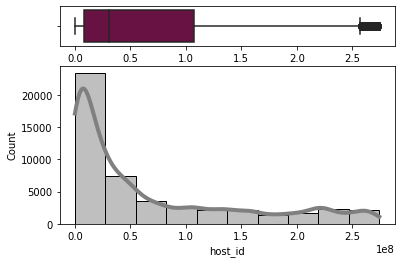

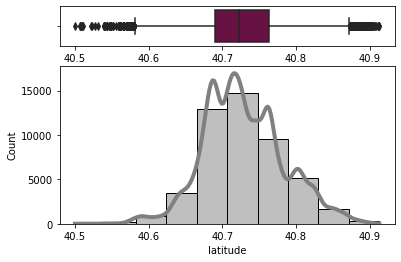

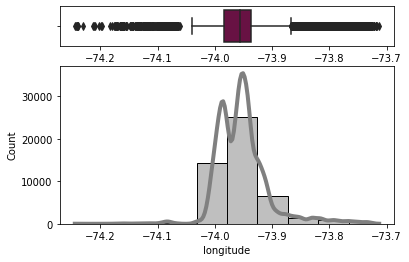

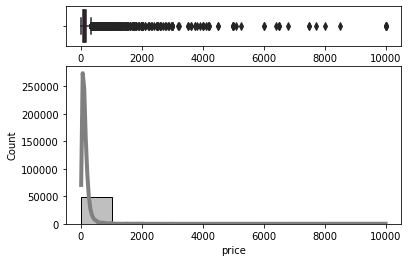

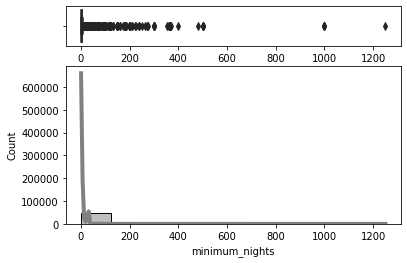

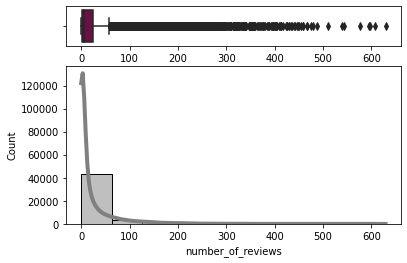

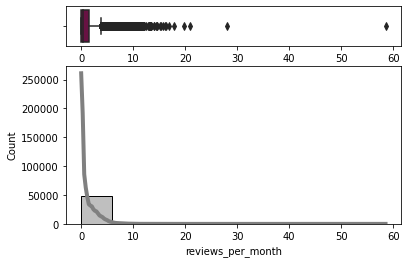

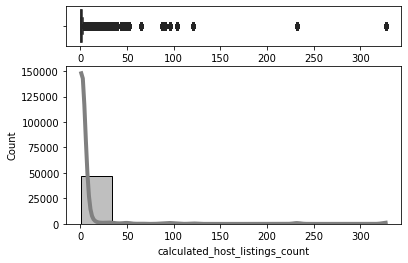

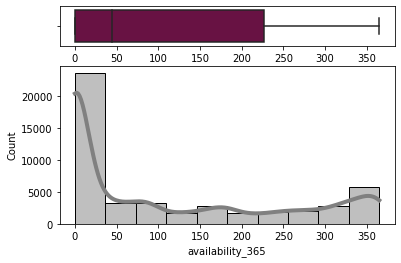

In [334]:
for i in data.select_dtypes(include="number").columns:
    fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=i,data=data, color="#760445", ax=ax1)
    sns.histplot(x=i,data=data, kde=True, color="#808080", line_kws={"lw":4}, bins=10, ax=ax2)
    plt.show()

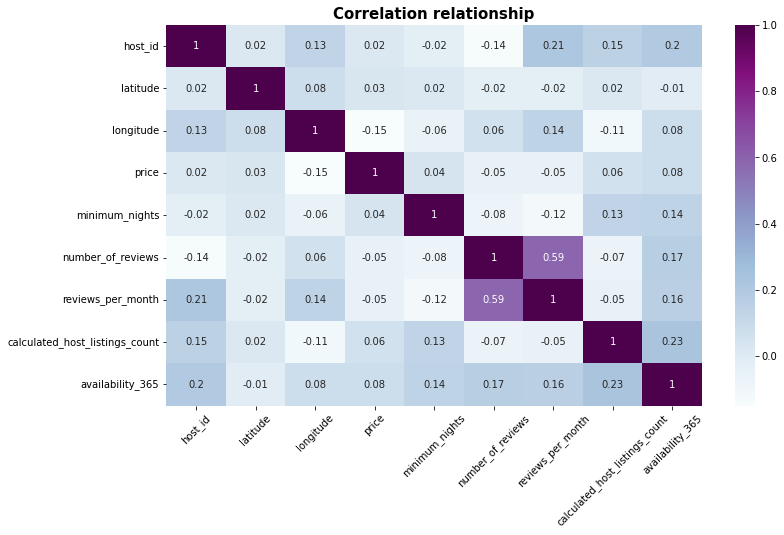

In [335]:
plt.figure(figsize=(12,7))
sns.heatmap(round(data.corr(),2), annot=True, cmap="BuPu")
plt.title("Correlation relationship", fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

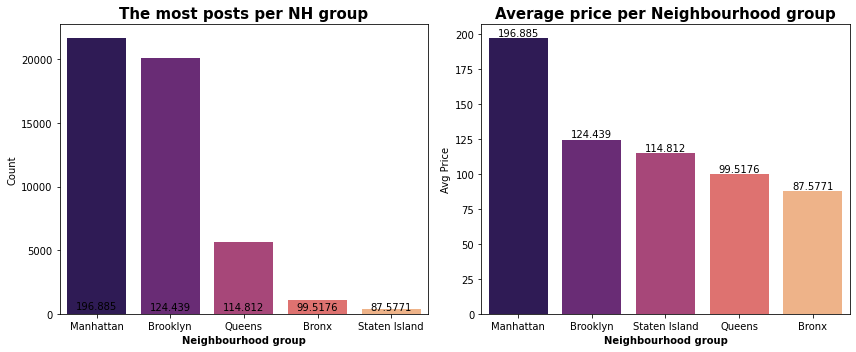

In [336]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
haz = sns.barplot(x="neighbourhood_group", y="price", data=data.groupby("neighbourhood_group").agg({"price":"mean"}).sort_values(by="price",ascending=False).reset_index(), ci=False, palette="magma", ax=ax2)
haz1 = sns.barplot(x="neighbourhood_group", y="price", data=data.groupby("neighbourhood_group").agg({"price":"count"}).sort_values(by="price",ascending=False).reset_index(), ci=False, palette="magma", ax=ax1)
haz.bar_label(haz.containers[0])
haz1.bar_label(haz.containers[0])
ax2.set_title("Average price per Neighbourhood group", fontsize=15, weight="bold")
ax1.set_title("The most posts per NH group", fontsize=15, weight="bold")
ax1.set_ylabel("Count")
ax2.set_ylabel("Avg Price")
ax2.set_xlabel("Neighbourhood group", size=10, weight="bold")
ax1.set_xlabel("Neighbourhood group", size=10, weight="bold")
plt.tight_layout()
plt.show()

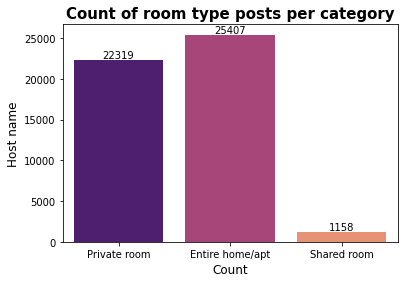

In [337]:
haz = sns.countplot(x="room_type",data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Count of room type posts per category", fontsize=15, fontweight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Host name", fontsize=12)
plt.show()

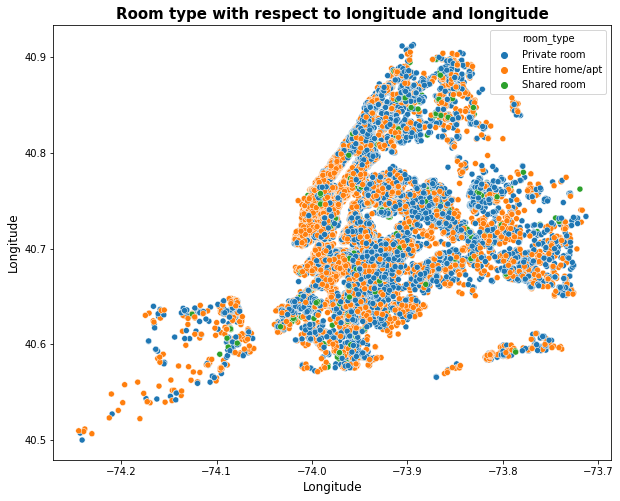

In [338]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x="longitude",y="latitude", hue="room_type")
plt.title("Room type with respect to longitude and longitude", fontsize=15, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.show()

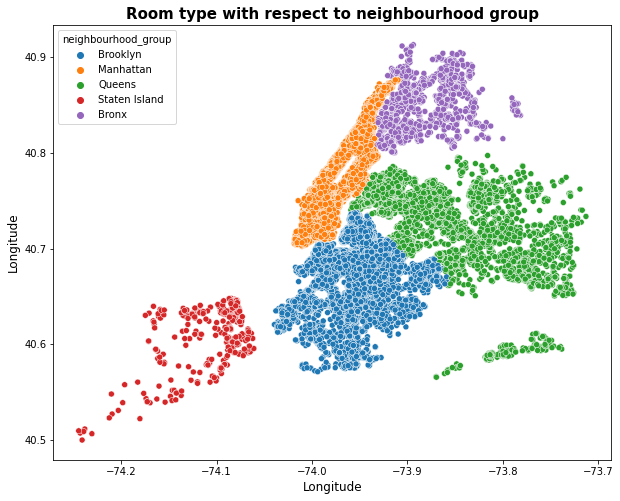

In [339]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x="longitude",y="latitude", hue="neighbourhood_group")
plt.title("Room type with respect to neighbourhood group", fontsize=15, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.show()

In [340]:
data.loc[~(data["price"] > data["price"].quantile(0.99))]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.02,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Unknown,0.02,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Unknown,0.02,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Unknown,0.02,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Unknown,0.02,6,2


# ML Models

In [341]:
# Dropping unncesessary columns and categorizing categorical values into numbers by using .cat.codes.
data = data.drop(columns=["name", "host_id", "host_name", "last_review"])
data = pd.get_dummies(data, columns=["neighbourhood_group", "neighbourhood", "room_type"], 
                          prefix=["ng", "n", "rt"], drop_first=True)
# for i in data.select_dtypes(include="object").columns:
#     data[i] = data[i].astype("category")
#     data[i] = data[i].cat.codes
# for i in ["neighbourhood_group","room_type"]:
#     print(i)
#     print(data[i].value_counts())
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,...,n_Williamsbridge,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside,rt_Private room,rt_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.02,1,365,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [342]:
# Splitting the data into X and Y and then testing/training.
from sklearn.model_selection import train_test_split
X = data.drop(columns="price")
y = data["price"]
# xTrain, xTest, yTrain, yTest = train_test_split(X,y)
# yTrain = yTrain.to_numpy()
# yTest = yTest.to_numpy()
# yTrain = yTrain.reshape(-1,1)
# yTest = yTest.reshape(-1,1)

In [343]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X.shape)
print(y.shape)
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop(columns="price").columns)
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

(48884, 233)
(48884,)


In [344]:
print("Average price - Training dataset = {}".format(yTrain.mean()))
print("Average price - Testing dataset = {}".format(yTest.mean()))

Average price - Training dataset = 153.04653192591985
Average price - Testing dataset = 151.8806153342607


In [345]:
# Importing metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from math import sqrt

In [346]:
# We will use:
# 1 Linear Regression
# 2 Decision Tree Regression
# 3 Random Forest Regression
# 4 Gradient Boosting Regression
# 5 SVR
# 6 Lasso Regression
# 7 Ridge Regression

# Creating a table for results.
results = pd.DataFrame(columns=["Model no.","R2Train","R2Test","MAEtrain","MAEtest","MSEtrain","MSEtest"])

# Defining function for model
def regressionmodel(test):
    test.fit(xTrain,yTrain)
    r2train = r2_score(yTrain, test.predict(xTrain))
    r2test = r2_score(yTest, test.predict(xTest))
    maetrain = mean_absolute_error(yTrain, test.predict(xTrain))
    maetest = mean_absolute_error(yTest, test.predict(xTest))
    msetrain = mean_squared_error(yTrain, test.predict(xTrain))
    msetest = mean_squared_error(yTest, test.predict(xTest))
    print("R2 Score - Training dataset = {}".format(r2train))
    print("R2 Score - Testing dataset = {}".format(r2test),"\n")
    print("MAE - Training dataset = {}".format(maetrain))
    print("MAE - Testing dataset = {}".format(maetest),"\n")
    print("MSE - Training dataset = {}".format(msetrain))
    print("MSE - Testing dataset = {}".format(msetest))
    results.loc[len(results.index)] = [len(results.index)+1,r2train,r2test,maetrain,maetest,msetrain,msetest]
    # if test == LR:
    #     results.loc[len(results.index)] = ["LR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # elif test == LAR:
    #     results.loc[len(results.index)] = ["LAR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # elif test == RFR:
    #     results.loc[len(results.index)] = ["RFR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # elif test == GBR:
    #     results.loc[len(results.index)] = ["GBR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # elif test == SVR:
    #     results.loc[len(results.index)] = ["SVR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # elif test == LAR:
    #     results.loc[len(results.index)] = ["LAR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # elif test == RR:
    #     results.loc[len(results.index)] = ["RR",r2train,r2test,maetrain,maetest,msetrain,msetest]
    # else:
    #     results.loc[len(results.index)] = ["Unknown",r2train,r2test,maetrain,maetest,msetrain,msetest]

def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.","\n")
        from sklearn.preprocessing import StandardScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,y)
        scal = StandardScaler()
        xTrain = scal.fit_transform(xTrain)
        xTest = scal.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.","\n")
        from sklearn.preprocessing import MinMaxScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,y)
        norm = MinMaxScaler()
        xTrain = norm.fit_transform(xTrain)
        xTest = norm.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.","\n")

In [347]:
transformization("none")
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
regressionmodel(LR)

You didn't select any type of transformation of features, proceeding with the original dataset. 

R2 Score - Training dataset = 0.11667150407350946
R2 Score - Testing dataset = -7.864388123974698e+23 

MAE - Training dataset = 71.75532482835908
MAE - Testing dataset = 1960873381190.3628 

MSE - Training dataset = 52890.76095941636
MSE - Testing dataset = 4.018017560188508e+28


In [348]:
from sklearn.linear_model import Lasso
LAR = Lasso()
regressionmodel(LAR)

R2 Score - Training dataset = 0.11442283217878324
R2 Score - Testing dataset = 0.11460687695690386 

MAE - Training dataset = 70.99852897000365
MAE - Testing dataset = 70.95706436309264 

MSE - Training dataset = 53025.403924302685
MSE - Testing dataset = 45235.87925692705


In [349]:
results

,Model no.,R2Train,R2Test,MAEtrain,MAEtest,MSEtrain,MSEtest
0,1.0,0.116672,-7.864388e+23,71.755325,1.960873e+12,52890.760959,4.018018e+28
1,2.0,0.114423,1.146069e-01,70.998529,7.095706e+01,53025.403924,4.523588e+04
